# Segmenting Data with k-Means Clustering

## Learning Objectives
The primary objective of clustering is to group items within a dataset based on similarity. **k-Means Clustering** is one of the most popular and easy to use clustering approaches. With k-Means Clustering, similarity is based on a distance metric known as euclidean distance. By the end of this tutorial, you will have learned: 
+ How to import, explore and prepare data for k-Means Clustering
+ How to segment data using k-Means Clustering
+ How to evaluate and visualize clusters
+ How to choose an appropriate number of clusters
+ How to analyze the results of k-Means Clustering

## 1. Collect the Data
Let's import and preview it:

In [1]:
import pandas as pd
customers = pd.read_csv("mallcustomers.csv")

In [2]:
customers.head()

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40


## 2. Explore the Data
Next, let's get a concise summary of the structure and the values within the dataset:

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# getting summary statistics for all features, including non-numeric ones
customers.describe(include = 'all').round(2)

,CustomerID,Gender,Age,Income,SpendingScore
count,200.00,200,200.00,200.00,200.00
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.50,NaN,38.85,60560.00,50.20
std,57.88,NaN,13.97,26264.72,25.82
min,1.00,NaN,18.00,15000.00,1.00
25%,50.75,NaN,28.75,41500.00,34.75
50%,100.50,NaN,36.00,61500.00,50.00
75%,150.25,NaN,49.00,78000.00,73.00


A visual exploration of the dataset can provide us with some additional insight.

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

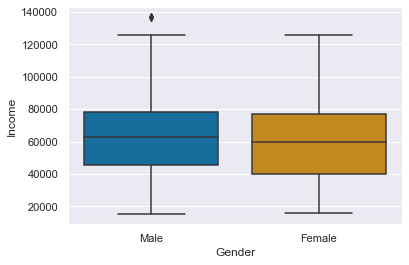

In [6]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'Income', 
                 palette = 'colorblind')

There isn't a significant difference in income between men and women in the data. 

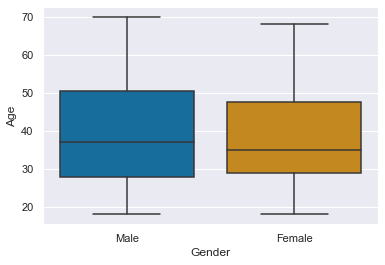

In [7]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'Age', 
                 palette = 'colorblind')

There isn't a significant difference in age between men and women in the data.

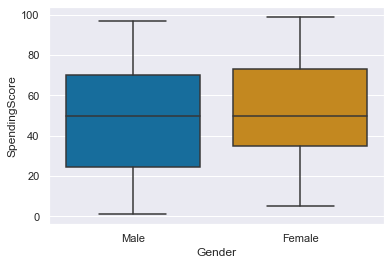

In [8]:
ax = sns.boxplot(data = customers, 
                 x = 'Gender', 
                 y = 'SpendingScore', 
                 palette = 'colorblind')

There isn't a significant difference in spending score between men and women in the data.

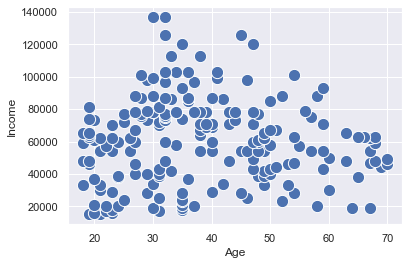

In [9]:
# checking the relationship between income and age
ax = sns.scatterplot(data = customers, 
                     x = 'Age', 
                     y = 'Income',
                     s = 150)

There is a <b>slight</b> positive linear relationship between income and age, specifically between the ages of 20 and 40. On the other hand, the relationship appears to become <b>slightly</b> negative for those older than 50. 

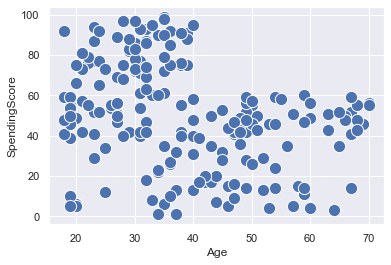

In [10]:
# checking the relationship between spending score and age
ax = sns.scatterplot(data = customers, 
                     x = 'Age', 
                     y = 'SpendingScore',
                     s = 150)

There appears to be a stronger positive relationship between spending score and age for those on the 40 years old than those older than 40.

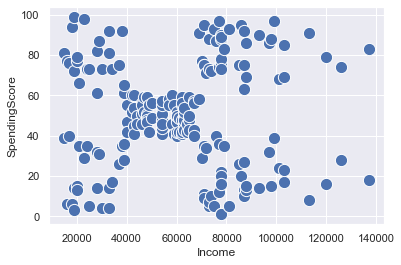

In [11]:
# checking the relationship between spending score and income
ax = sns.scatterplot(data = customers, 
                     x = 'Income', 
                     y = 'SpendingScore',
                     s = 150)

There isn't a clear relationship between the two variables based on the plot. However, we get a sense of possible clusters arising from the data. Moreover, there seems to be a significant difference in the range of values between spending score and income.

## 3. Prepare the Data

In [12]:
# getting summary statistics just for income and spending score variables
customers[['Income', 'SpendingScore']].describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,60560.00,50.20
std,26264.72,25.82
min,15000.00,1.00
25%,41500.00,34.75
50%,61500.00,50.00
75%,78000.00,73.00
max,137000.00,99.00


Among the summary statistics, it is significant to look at the standard deviation. By looking at the standard deviation for income, it can be inferred that the income feature would dominate the distance calculations if we attempt to form clusters using the data as is, while the spending score would have little to no impact on the process. To avoid this, there is a need to standardize the two features.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
customers_scaled = scaler.fit_transform(customers[['Income', 'SpendingScore']]) # returns a NumPy array

In [15]:
customers_scaled = pd.DataFrame(customers_scaled, columns = ['Income', 'SpendingScore']) # converting array to DataFrame

In [16]:
customers_scaled.describe().round(2)

,Income,SpendingScore
count,200.00,200.00
mean,-0.00,-0.00
std,1.00,1.00
min,-1.74,-1.91
25%,-0.73,-0.60
50%,0.04,-0.01
75%,0.67,0.89
max,2.92,1.89


As expected, mean becomes 0 and standard deviation becomes 1. For reference, the approach used is Z-score normalization.

## 3. Create the Clusters

In [17]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, n_init = 25, random_state = 1234)

# arguments:
# n_clusters (or k) - number of clusters to form
# n_init - number of times the k-Means algorithm should be run with different centroid seeds (default is 10)
# random_state - random initialization seed to be used to generate the cluster centers (for reproducibility)

In [18]:
km.fit(customers_scaled) # clustering the data

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [19]:
km.labels_ # to get cluster assignments

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

The cluster assignments correspond to the order of instances in the customer scale dataset.

In [20]:
km.inertia_

157.7040081503595

This is the total within-cluster sum of squares, or WCSS, for the clusters.

## 4. Evaluate and Visualize the Clusters 

In [21]:
# getting the number of items in each cluster
pd.Series(km.labels_).value_counts().sort_index()

0     38
1     39
2    123
dtype: int64

Note: In the video, Cluster 0 has 123 customers, Cluster 1 has 38 customers, while Cluster 2 has 39 customers.

In [22]:
km.cluster_centers_ # getting the coordinates of the cluster centers or centroids as a NumPy array

array([[ 1.00919971, -1.22553537],
       [ 0.99158305,  1.23950275],
       [-0.62618966, -0.01439238]])

In [23]:
# creating a DataFrame to easily interpret the cluster centers
cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['Income', 'SpendingScore'])
cluster_centers

,Income,SpendingScore
0,1.009200,-1.225535
1,0.991583,1.239503
2,-0.626190,-0.014392


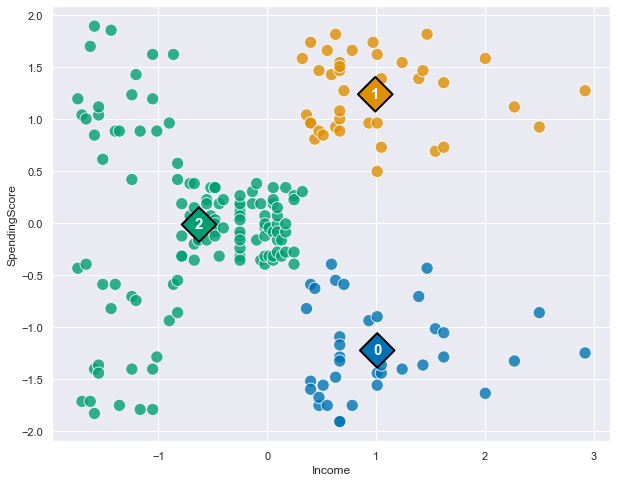

In [24]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

# Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

Cluster 2 here (Cluster 0 in the video) could benefit from additional partitioning.

## 5. Choose the right number of Clusters

### The Within Cluster Sum of Squares (WCSS) (or the elbow method)

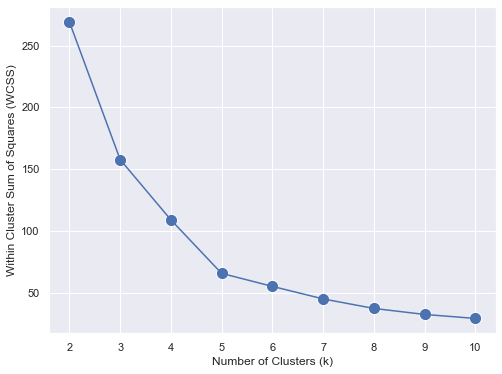

In [25]:
# getting the WCSS for each k by appending the inertia to the list
wcss = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    wcss.append(km.inertia_)

# converting the list to a pandas Series
wcss_series = pd.Series(wcss, index = range(2, 11))

# plotting k vs. the WCSS values per k
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = wcss_series, x = wcss_series.index)
ax = sns.scatterplot(y = wcss_series, x = wcss_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Within Cluster Sum of Squares (WCSS)')

The plot suggests that the appropriate value for k is likely 5.

### The Average Silhouette Score

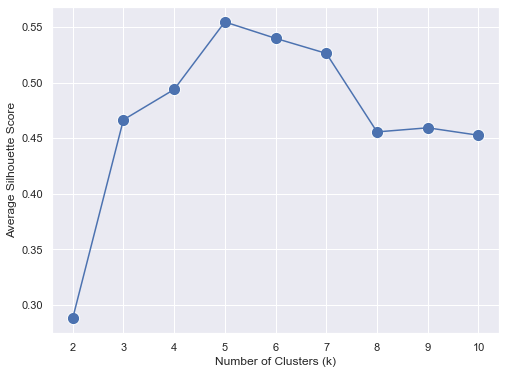

In [26]:
from sklearn.metrics import silhouette_score

# getting the average silhouette score for each k by appending it to the list
silhouette = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    silhouette.append(silhouette_score(customers_scaled, km.labels_))

# converting the list to a pandas Series
silhouette_series = pd.Series(silhouette, index = range(2, 11))

# plotting k vs. each average silhouette score per k
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = silhouette_series, x = silhouette_series.index)
ax = sns.scatterplot(y = silhouette_series, x = silhouette_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Average Silhouette Score')

With the average silhouette method, the k-value corresponding to the highest average silhouette score represents the optimal number of clusters. From the plot, it can be seen that the suggested value for k is 5.

### The Calinski Harabasz Score

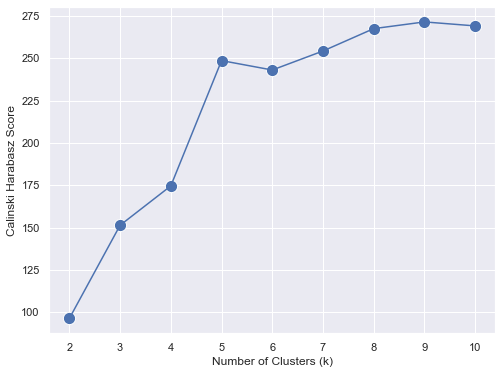

In [27]:
from sklearn.metrics import calinski_harabasz_score

# getting the calinski-harabasz score for each k by appending it to the list
calinski = []
for k in range(2, 11):
    km = KMeans(n_clusters = k, n_init = 25, random_state = 1234)
    km.fit(customers_scaled)
    calinski.append(calinski_harabasz_score(customers_scaled, km.labels_))

# converting the list to a pandas Series
calinski_series = pd.Series(calinski, index = range(2, 11))

# plotting k vs. each calinski-harabasz score per k 
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y = calinski_series, x = calinski_series.index)
ax = sns.scatterplot(y = calinski_series, x = calinski_series.index, s = 150)
ax = ax.set(xlabel = 'Number of Clusters (k)', 
            ylabel = 'Calinski Harabasz Score')

Based on the Calinski-Harabasz Score, the optimal value for k is that which correponds to either the highest score or the first abrupt elbow in the plot. The highest score is at k equal to 9 while the score at the first abrupt elbow has k equal to 5. However, since the first two approaches suggested 5 as the optimal number of clusters, we'll settle at 5 for k.

## 6. Analyze and Interpret the Clusters

In [28]:
# note that n_clusters is now set to 5 (the k-value obtained from the methods to obtain the right k) rather than 3
km = KMeans(n_clusters = 5, n_init = 25, random_state = 1234)
km.fit(customers_scaled)

KMeans(n_clusters=5, n_init=25, random_state=1234)

In [29]:
# creating a DataFrame to easily interpret and visualize the cluster centers
cluster_centers = pd.DataFrame(km.cluster_centers_, columns = ['Income', 'SpendingScore'])

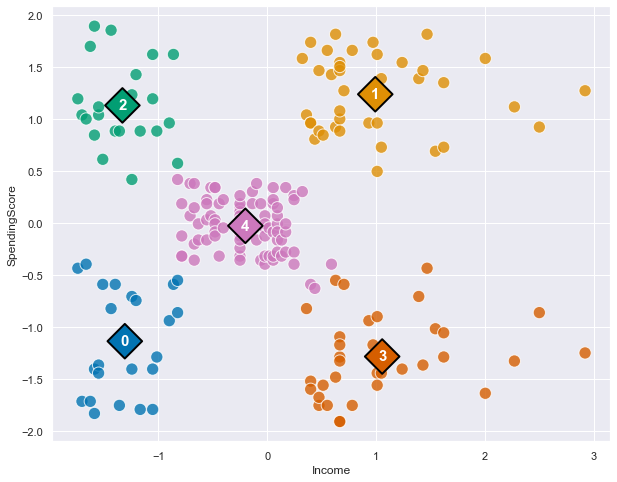

In [30]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Plot the Clusters
ax = sns.scatterplot(data = customers_scaled,
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

# Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'Income',
                     y = 'SpendingScore', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)


# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.Income[i], 
                        y = cluster_centers.SpendingScore[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

Note that Cluster 2 before (Cluster 0 in the video) has now been split into two more clusters.

Assigning the clusters back to the customers:

In [31]:
customers['Cluster'] = km.labels_.tolist()
customers.head(10)

,CustomerID,Gender,Age,Income,SpendingScore,Cluster
0,1,Male,19,15000,39,0
1,2,Male,21,15000,81,2
2,3,Female,20,16000,6,0
3,4,Female,23,16000,77,2
4,5,Female,31,17000,40,0
5,6,Female,22,17000,76,2
6,7,Female,35,18000,6,0
7,8,Female,23,18000,94,2
8,9,Male,64,19000,3,0
9,10,Female,30,19000,72,2


In [32]:
customers = pd.get_dummies(customers, columns = ['Gender'])
customers.head(10)

,CustomerID,Age,Income,SpendingScore,Cluster,Gender_Female,Gender_Male
0,1,19,15000,39,0,0,1
1,2,21,15000,81,2,0,1
2,3,20,16000,6,0,1,0
3,4,23,16000,77,2,1,0
4,5,31,17000,40,0,1,0
5,6,22,17000,76,2,1,0
6,7,35,18000,6,0,1,0
7,8,23,18000,94,2,1,0
8,9,64,19000,3,0,0,1
9,10,30,19000,72,2,1,0


In [33]:
# getting the summary statistics for all customers
customers.agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

Gender_Female        0.56
Gender_Male          0.44
Age                 36.00
Income           61500.00
SpendingScore       50.00
dtype: float64

In [34]:
# getting the summary statistics for the same features group into the created clusters
customers.groupby('Cluster').agg({
    'Gender_Female': 'mean',
    'Gender_Male': 'mean',
    'Age': 'median',
    'Income': 'median',
    'SpendingScore': 'median'}).round(2)

,Gender_Female,Gender_Male,Age,Income,SpendingScore
Cluster,,,,,
0,0.61,0.39,46.0,25000.0,17.0
1,0.54,0.46,32.0,79000.0,83.0
2,0.59,0.41,23.5,24500.0,77.0
3,0.46,0.54,42.0,85000.0,16.0
4,0.59,0.41,46.0,54000.0,50.0


#### What actionable insights can you come up with based on the clustering results?

* Representation of women in Cluster 0 is higher than the average. Also, customers in Cluster 0 tend to be older, earn less, and spend less than the average.
* Customers in Cluster 1 mimic the gender distribution of the entire dataset. Also, they are slightly younger than average, but earn and spend more than the average.
* The gender distribution of customers in Cluster 2 also mimics that of the entire dataset. However, they tend to be much younger and earn less than the average customer. Interestingly, the tend to spend more than the average customer.
* Customers in Cluster 3 are more likely to be male, tend to be older, earn more, but spend less than the average customer.
* Similar to Cluster 2, the gender distribution of customers in Cluster 4 mimics that of the overall dataset. However, they tend to be older than the average, earn a little less than the average, but have an average spending score.
* In terms of a customer relations strategy, it would make sense to invest and increasing the spending of the high earning, low spending customers in Cluster 3. Secondly, it would make sense to keep the high earning, high spending customers in Cluster 1 happy. Lastly, it would make sense to keep a watchful eye on the low earning, high spending customers in Cluster 2.